In [1]:
import pandas as pd
import statsmodels.api as sm
from patsy import dmatrices

In [2]:
df = pd.read_csv("/content/aptos.txt", sep = "\t", encoding = "latin1")

In [3]:
df["Precio"] = pd.to_numeric(df["Precio"].str.replace(",",""))

In [4]:
df

,Precio,Area,Estrato,Ciudad
0,350000000,70,4,Medellin
1,575000000,150,5,Bogotá
2,305000000,90,5,B/manga
3,480000000,110,4,Bogotá
4,395000000,110,5,Cali
5,315000000,110,3,B/manga
6,325000000,40,3,Bogotá
7,470000000,140,6,Cali
8,510000000,110,6,Bogotá
9,360000000,50,4,Bogotá


In [5]:
df["Ciudad"].unique()

array(['Medellin', 'Bogotá', 'B/manga', 'Cali'], dtype=object)

In [6]:
df = df.dropna()

In [7]:
df

,Precio,Area,Estrato,Ciudad
0,350000000,70,4,Medellin
1,575000000,150,5,Bogotá
2,305000000,90,5,B/manga
3,480000000,110,4,Bogotá
4,395000000,110,5,Cali
5,315000000,110,3,B/manga
6,325000000,40,3,Bogotá
7,470000000,140,6,Cali
8,510000000,110,6,Bogotá
9,360000000,50,4,Bogotá


In [8]:
y, x = dmatrices('Precio ~ Area + Estrato + Ciudad', data = df, return_type = "dataframe")

In [9]:
x

,Intercept,Ciudad[T.Bogotá],Ciudad[T.Cali],Ciudad[T.Medellin],Area,Estrato
0,1.0,0.0,0.0,1.0,70.0,4.0
1,1.0,1.0,0.0,0.0,150.0,5.0
2,1.0,0.0,0.0,0.0,90.0,5.0
3,1.0,1.0,0.0,0.0,110.0,4.0
4,1.0,0.0,1.0,0.0,110.0,5.0
5,1.0,0.0,0.0,0.0,110.0,3.0
6,1.0,1.0,0.0,0.0,40.0,3.0
7,1.0,0.0,1.0,0.0,140.0,6.0
8,1.0,1.0,0.0,0.0,110.0,6.0
9,1.0,1.0,0.0,0.0,50.0,4.0


In [10]:
x.iloc[20]

Intercept              1.0
Ciudad[T.Bogotá]       0.0
Ciudad[T.Cali]         1.0
Ciudad[T.Medellin]     0.0
Area                  40.0
Estrato                3.0
Name: 20, dtype: float64

In [11]:
df.iloc[20]

Precio     225000000
Area              40
Estrato            3
Ciudad          Cali
Name: 20, dtype: object

In [12]:
modelo = sm.OLS(y,x).fit()
print(modelo.summary())

                            OLS Regression Results                            
Dep. Variable:                 Precio   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 2.951e+27
Date:                Sat, 28 Oct 2023   Prob (F-statistic):          6.96e-202
Time:                        17:11:39   Log-Likelihood:                 236.77
No. Observations:                  21   AIC:                            -461.5
Df Residuals:                      15   BIC:                            -455.3
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept               5e+07   3.88

In [14]:
print("El r cuadrado es de: "+str(modelo.rsquared))

El r cuadrado es de: 1.0


In [15]:
def pronostico(area, estrato, ciudad):
  if ciudad == "B/manga":
    coef = 0
  else:
    coef = modelo.params["Ciudad[T."+ciudad+"]"]
  precio = coef + (modelo.params["Area"]*area) + (modelo.params["Estrato"]*estrato) + modelo.params["Intercept"]
  return precio

In [18]:
area = int(input("Ingrese el area: "))
estrato = int(input("Ingrese el estrato: "))
ciudad = input("Ingrese la ciudad(B/manga - Bogotá - Cali - Medellin): ")

pronostico(area, estrato, ciudad)

Ingrese el area: 70
Ingrese el estrato: 4
Ingrese la ciudad(B/manga - Bogotá - Cali - Medellin): Medellin


349999999.99999684

In [ ]:
df

,Precio,Area,Estrato,Ciudad
0,350000000,70,4,Medellin
1,575000000,150,5,Bogotá
2,305000000,90,5,B/manga
3,480000000,110,4,Bogotá
4,395000000,110,5,Cali
5,315000000,110,3,B/manga
6,325000000,40,3,Bogotá
7,470000000,140,6,Cali
8,510000000,110,6,Bogotá
9,360000000,50,4,Bogotá


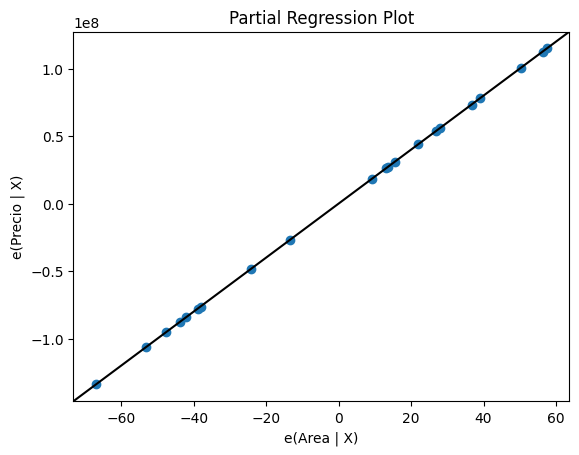

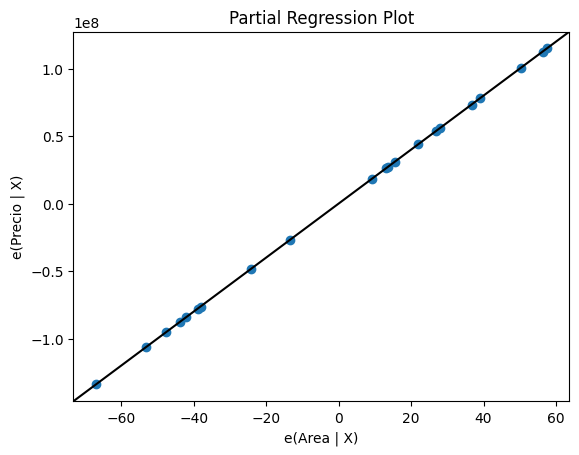

In [19]:
sm.graphics.plot_partregress('Precio', 'Area', ['Estrato', 'Ciudad'], data = df, obs_labels = False)